**Цель работы:**

Изучение алгоритмов и методов регрессии на практике .

### Описание предметной области

Вариант №1

Набор данных: regression.xlsx, salary.csv

Атрибуты: dtypes – тип значений в столбцах,
columns – список с названиями столбцов,
shape – размер таблицы, содержит кортеж из количества строк и столбцов.


### 1.Простая линейная регрессия 

Загружаем набор данных regression.xlsx с помощью библиотеки pandas openpyxl

In [1]:
import pandas as pd

df = pd.read_excel("regression.xlsx")
print(df.head())

         x1        x2         y
0  1.929428  1.511727  5.734255
1 -0.330281 -0.898878 -0.623706
2  0.688773  0.908247  1.028884
3 -0.008892 -0.518823 -0.894802
4 -1.698716  0.610347  2.822400


Создаются две модели линейной регрессии. Первая модель (model_1) обучается на одном признаке "x1", для которого данные предварительно преобразуются в двумерный массив и переформируются в формат, требуемый scikit-learn. Переменная "y" используется как целевая переменная для обучения. 

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
x1 = df[["x1"]].values
x2 = df[["x2"]].values
y = df['y'].values
model_1 = LinearRegression ()
model_2 = LinearRegression()
model_1.fit(np.array(x1).reshape(-1,1), y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Вторая модель (model_2) инициализирована и обучена.

In [3]:
model_2.fit(np.array(x2).reshape(-1,1), y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


С помощью predict() выполняется предсказание значений для соответствующих значений X1, на основе обученной модели линейной регрессии. Создается датафрейм с актуальными и предсказанными значениями.

In [4]:
y_predict=model_1.predict(np.array(x1).reshape(-1, 1))
predict_1=pd.DataFrame({'Actual': y, 'Predicted': y_predict})
predict_1

,Actual,Predicted
0,5.734255,1.412975
1,-0.623706,1.314354
2,1.028884,1.358829
3,-0.894802,1.328381
4,2.822400,1.254632
...,...,...
995,2.484801,1.248727
996,1.452523,1.326870
997,0.389341,1.285069
998,0.345363,1.308702


С помощью predict() выполняется предсказание значений для соответствующих значений X2, на основе обученной второй модели линейной регрессии. Создается датафрейм с актуальными и предсказанными значениями.

In [5]:
y_predict_2=model_2.predict(np.array(x2).reshape(-1, 1))
predict_2=pd.DataFrame({'Actual': y, 'Predicted': y_predict_2})
predict_2

,Actual,Predicted
0,5.734255,2.549342
1,-0.623706,0.602974
2,1.028884,2.062081
3,-0.894802,0.909838
4,2.822400,1.821551
...,...,...
995,2.484801,0.685537
996,1.452523,2.532040
997,0.389341,0.301583
998,0.345363,1.591217


Вторая модель демонстрирует адекватную работу, в то время как первая модель практически бесполезна из-за отсутствия линейной зависимости между X1 и y. Это подтверждает важность выбора правильных признаков для обучения моделей машинного обучения.

Для вычисления метрик качества регрессии, из бибилотеки sklearn.metrics импортируются функции mean_squared_error, mean_absolute_error, mean_squared_error, r2_score. Функция mean_squared_error вычисляет среднеквадратичную ошибку (MSE) между фактическими и предсказанными значениями. Функция mean_absolute_error вычисляет среднюю абсолютную ошибку (MAE) между фактическими и предсказанными значениями. Root Mean Squared Error (RMSE) представляет собой стандартное отклонение ошибок модели, это квадратный корень из среднеквадратичной ошибки. Функция r2_score вычисляет коэффициент детерминации между фактическими значениями (y) и предсказанными значениями (y_predict). R2 - это мера того, насколько хорошо модель соответствует данным.

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score

MSE = mean_squared_error(y, y_predict)
MAE = mean_absolute_error(y, y_predict)
RMSE= np.sqrt(MSE)
R2_1 = r2_score(y, y_predict)

print("MSE:", MSE)
print("MAE:", MAE)
print("RMSE:", RMSE)
print("R2:", R2_1)


MSE: 2.6062572567108337
MAE: 1.315220878253546
RMSE: 1.6143906766055216
R2: 0.0009734863147641271


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score

MSE2 = mean_squared_error(y, y_predict_2)
MAE2 = mean_absolute_error(y, y_predict_2)
RMSE2= np.sqrt(MSE2)
R2_2 = r2_score(y, y_predict_2)

print("MSE:", MSE2)
print("MAE:", MAE2)
print("RMSE:", RMSE2)
print("R2:", R2_2)

MSE: 1.7396409126781343
MAE: 1.0979853814676803
RMSE: 1.3189544771060653
R2: 0.3331635272834216


На основе метрик видно, что вторая модель значительно превосходит первую по всем показателям. Первая модель практически бесполезна - ее коэффициент детерминации близок к нулю, что означает отсутствие какой-либо прогнозной способности. Вторая модель уже демонстрирует умеренное качество, объясняя около трети изменчивости данных и имея существенно меньшие ошибки предсказания. Это явно указывает на то, что используемые во второй модели признаки имеют гораздо более сильную связь с целевой переменной, чем признаки в первой модели. Однако даже вторая модель еще далека от идеала и требует дальнейшего улучшения.

Были выведены коэффициенты a и b, где a- коэффициент наклона, b- коэффициент смещения. Coef выводит массив коэффициентов наклона для каждой независимой переменной, [0] используется для извлечения первого (и единственного) элемента этого массива. Intercept извлекает коэффициент смещения из обученной модели линейной регрессии.

In [8]:
a = model_1.coef_[0]
b = model_1.intercept_
a2 = model_2.coef_[0]
b2 = model_2.intercept_

print("Коэффициент 1 а:", a)
print("Коэффициент 1 b:", b)
print("Коэффициент 2 а:", a2)
print("Коэффициент 2 b:", b2)

Коэффициент 1 а: 0.043643067485881926
Коэффициент 1 b: 1.3287687260620968
Коэффициент 2 а: 0.8074189996470656
Коэффициент 2 b: 1.3287455574477376


Для визуализации регрессии, создается массив regression_line, содержащий предсказанные значения Y на основе коэффициента a, переменной X1 и коэффициента смещения b. С помощью plot построена линия регрессии, где X1 - это значения независимой переменной, regression_line - соответствующие предсказанные значения. Scatter строит точечный график на основе X1 и Y значений.

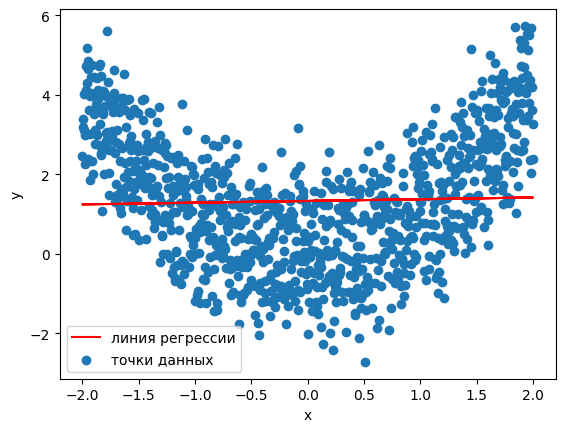

In [9]:
import matplotlib.pyplot as plt
regression_line = a * x1 + b

plt.plot(x1, regression_line,  color='red', label='линия регрессии')
plt.scatter(x1, y, label='точки данных' )
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Также со второй моделью. С помощью plot построена линия регрессии, где X2 - это значения независимой переменной, regression_line - соответствующие предсказанные значения. Scatter строит точечный график на основе X2 и Y значений.

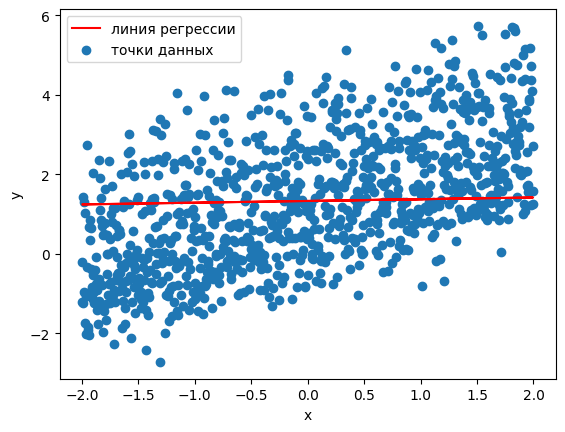

In [10]:
import matplotlib.pyplot as plt
regression_line = a * x2 + b

plt.plot(x2, regression_line,  color='red', label='линия регрессии')
plt.scatter(x2, y, label='точки данных' )
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Далее создается график разницы между предсказанными и фактическими значениями. Scatter создает точечный график, по оси X отложены значения переменной X1, а по оси Y - разница между предсказанными и фактическими значениями. Аxhline добавляет горизонтальную линию на уровне y=0, которая указывает на нулевую разницу между предсказанными и фактическими значениями.

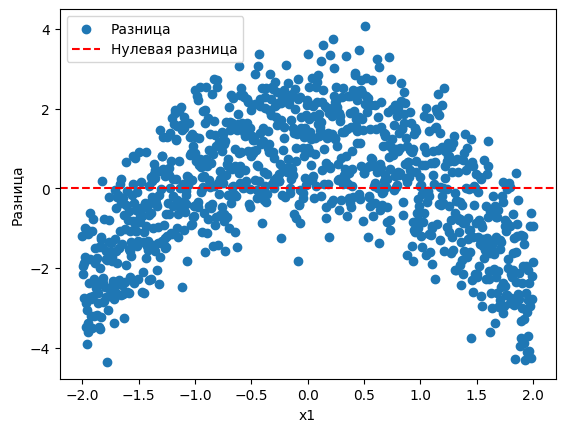

In [33]:
difference = y_predict - y

plt.scatter(x1, difference, label='Разница')
plt.axhline(y=0, color='red', linestyle='--', label='Нулевая разница')
plt.xlabel('x1')
plt.ylabel('Разница')
plt.legend()
plt.show()


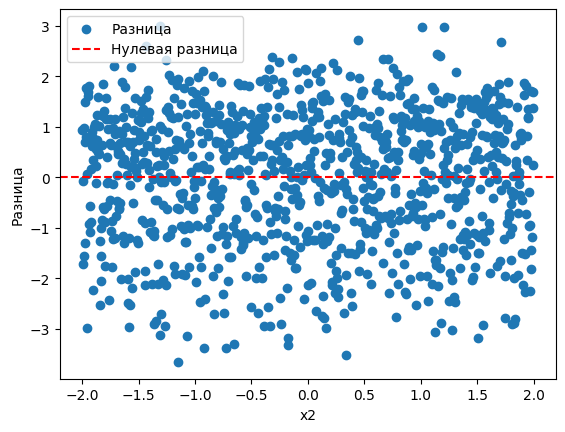

In [12]:
difference = y_predict_2 - y

plt.scatter(x2, difference, label='Разница')
plt.axhline(y=0, color='red', linestyle='--', label='Нулевая разница')
plt.xlabel('x2')
plt.ylabel('Разница')
plt.legend()
plt.show()

Можно сделать вывод, что модели не смогли полностью уловить зависимости в данных - остатки не являются случайными и показывают явную связь с признаками x1 и x2. Это свидетельствует о наличии нелинейных закономерностей в данных, которые линейные модели не в состоянии адекватно описать. При этом вторая модель на основе x2 работает несколько лучше первой.

Далее строится график, где линия- предсказанные значения, точки -фактические значения. Сравнение линии и точек на графике может помочь в оценке того, насколько модель соответствует фактическим данным. Если точки располагаются близко к линии, это может указывать на хорошее качество предсказания модели. Если есть значительное расхождение между линией и точками, это может свидетельствовать о несоответствии модели реальным данным.

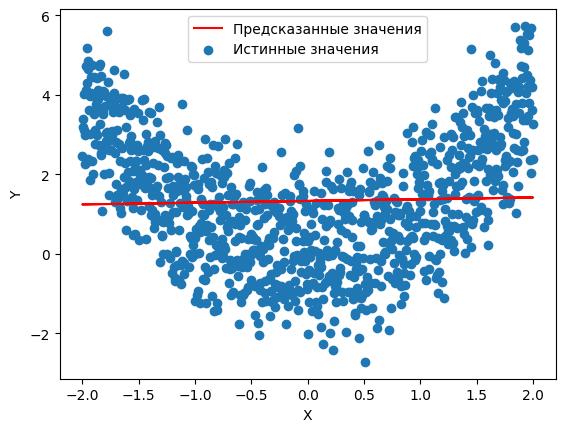

In [13]:
plt.plot(x1, y_predict, label='Предсказанные значения', color='red')
plt.scatter(x1, y, label='Истинные значения')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Красная линия предсказаний представляет собой почти горизонтальную прямую, в то время как фактические значения разбросаны хаотично по всему графику без какой-либо видимой линейной зависимости от признака x1. Это подтверждает, что между x1 и целевой переменной y отсутствует линейная связь

**Вывод**:
Качество моделей сильно зависит от выбора признака. Первая модель, построенная на признаке x1, показала низкое качество предсказаний (R² ≈ 0), что свидетельствует об отсутствии линейной зависимости между x1 и целевой переменной y. Вторая модель, использующая признак x2, оказалась значительно лучше, хотя также не является идеальной.

Метрики качества подтвердили визуальные наблюдения. Значения MSE, MAE, RMSE и R² для второй модели оказались существенно лучше, чем для первой, что указывает на её более высокую прогнозную способность.

Визуализация выявила нелинейность данных. Графики остатков показали, что линейная модель не полностью улавливает зависимости в данных. Остатки демонстрируют систематические отклонения, что говорит о наличии нелинейных закономерностей.

Таким образом, простая линейная регрессия полезна для выявления линейных зависимостей, но её применение ограничено в случае сложных или нелинейных взаимосвязей в данных.

### 2. Полиномиальная регрессия 

Полиномиальная регрессия – это алгоритм машинного обучения, который
используется для обучения линейной модели на нелинейных данных и позволяет
более точно оценить данные, так как иногда данные намного сложнее, чем прямая
линия. PolynomialFeatures(degree=2) - создает преобразователь для признаков второй степени. Берем х1, так как в линейной регрессии он давал  R² ≈ 0

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2)
x1_poly = poly_features.fit_transform(x1.reshape(-1, 1))
model_poly = LinearRegression()
model_poly.fit(x1_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Затем выполнялось предсказание с использованием predict(), создавался датафрем с фактическими и предсказанными значениями.

In [40]:
y_predict_poly = model_poly.predict(x1_poly)
df_poly = pd.DataFrame({'Actual': y, 'Predicted': y_predict_poly})
df_poly

,Actual,Predicted
0,5.734255,3.792801
1,-0.623706,0.094969
2,1.028884,0.503288
3,-0.894802,0.000412
4,2.822400,2.800822
...,...,...
995,2.484801,3.270951
996,1.452523,0.000709
997,0.389341,0.955655
998,0.345363,0.191228


Полиномиальная регрессия на признаке x1 показывает значительно лучшие результаты по сравнению с простой линейной регрессией. Предсказанные значения теперь варьируются в широком диапазоне, а не концентрируются вокруг одного числа. Однако все еще наблюдается существенное расхождение между актуальными и предсказанными значениями - модель часто занижает или завышает предсказания, что особенно заметно на примерах с большими актуальными значениями. Это указывает на то, что даже полиномиальная регрессия второй степени не полностью улавливает все зависимости в данных, но уже является значительным улучшением по сравнению с линейным подходом.

Вычислены средняя абсолютная ошибка (MAE) между фактическими и предсказанными значениями и коэффициент детерминации между фактическими значениями (y) и предсказанными значениями (y3_prediction).


In [41]:
from sklearn import metrics
print('MAE 3:', metrics.mean_absolute_error(y, y_predict_poly))
print('R2 metric 3:', metrics.r2_score(y, y_predict_poly))

MAE 3: 0.9115776638698979
R2 metric 3: 0.541784582304522


Метрики подтверждают наличие нелинейной квадратичной зависимости между x1 и целевой переменной, которую простая линейная регрессия не могла уловить.

Для визуализации регрессии, с помощью scatter показаны истинные значения, с помощью plot линия, которая представляет собой предсказанные значения для каждого значения X1 на основе обученной модели полиномиальной регрессии. Визуализация помогает сравнить, насколько хорошо модель соответствует данным.

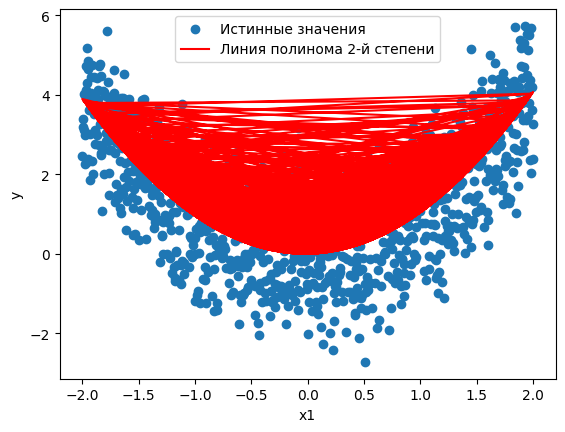

In [42]:
plt.scatter(x1, y, label='Истинные значения')
plt.plot(x1, y_predict_poly, label='Линия полинома 2-й степени', color='red')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()

На графике четко видно, что полиномиальная регрессия второй степени успешно уловила нелинейную зависимость в данных. Красная кривая хорошо повторяет общую форму распределения точек, демонстрируя характерную параболическую зависимость между x1 и y. Модель особенно точно описывает центральную часть данных, где наблюдается наибольшая концентрация точек. Однако на краях графика, где данных меньше, видны некоторые расхождения, что объясняет почему R² составляет 0.54, а не близкий к 1.

Далее создается объект модели полиномиальной регрессии со степенью полинома равной 6.

3.8092799581151464
0.1490242526973693
0.4500453657459983
0.07465676900058314
2.845622339687311
0.12335922892629061
0.43580450758416467
0.5184114575068608
0.9144710025587831
3.7805436748140693
1.4890618593376463
0.31008823297517585
1.5919887304344003
0.2896409077630946
0.8695989168810956
3.4045468482020675
3.985089045873713
0.4039322954957603
0.9249625389333154
1.879735626993164
0.08789397250024833
0.176771239363073
1.0862076493122343
0.3467359181193767
3.485613221016399
0.10125184033312787
0.09111659752510062
2.237213272004497
0.14783046134541278
2.0199035465179156
0.29443884599494125
1.3717275653805043
2.9373457056388386
1.747851576774657
1.1713536581692914
2.1735710861461026
3.412518739257237
0.5752605403158725
0.09690565896146403
3.746089669662198
3.357177369702659
2.048109543163064
2.893982849626333
0.4705912223903209
2.4556758804692853
4.007381824690938
0.14770045794820777
0.09028455382047623
0.2320018211174826
3.615587319532504
0.7295447235036103
2.2807586666075172
0.106658838783

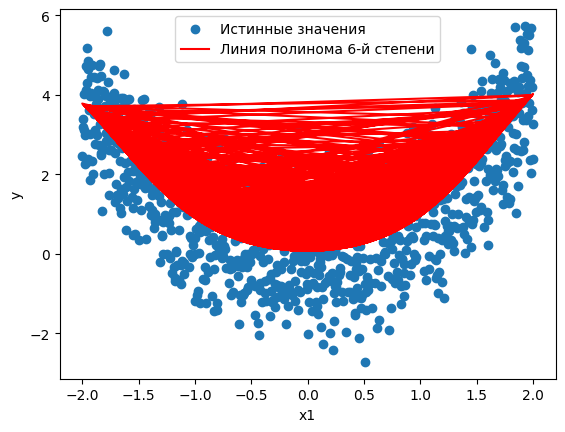

In [49]:
poly_features_6=PolynomialFeatures(degree=6)
x1_poly_6 = poly_features_6.fit_transform(x1.reshape(-1, 1))
model_poly_6 = LinearRegression()
model_poly_6.fit(x1_poly_6, y)
y_predict_poly_6 = model_poly_6.predict(x1_poly_6)

for  y_poly_6 in y_predict_poly_6:
    print(y_poly_6)

print('Mean Absolute Error 4:', metrics.mean_absolute_error(y, y_predict_poly_6))
print('R2 metric 4:', metrics.r2_score(y, y_predict_poly_6))  
plt.scatter(x1, y, label='Истинные значения')
plt.plot(x1, y_predict_poly_6, label='Линия полинома 6-й степени', color='red')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()  



Далее создается объект модели полиномиальной регрессии со степенью полинома равной 12.

3.8516103879256587
0.19732384587169577
0.4840089860826408
0.022081510341142387
2.8945615012595756
0.1532945017400687
0.46839816957734837
0.5568072555421708
0.8834754337971066
3.2535102556706192
1.4961531700978352
0.38167201366953984
1.5953424847209432
0.3630379101623621
0.8427378291320334
3.556109340626815
3.9359630968127783
0.43279638394037645
0.8930974819793631
1.8315299074027795
0.07437847721146043
0.23801519793999015
1.0449263628568912
0.3662373298433545
3.602313136359119
0.1078119807258643
0.02119143964660192
2.1951596052829574
0.09914455281738463
2.0055893355046996
0.3674817845287914
1.3830721452188683
3.0118802592074605
1.7452641169373257
1.1274454917421253
2.1520579451761312
3.4299297921883927
0.5943016811812399
0.027807641753675064
3.795864850764117
3.366182616926655
2.032488784495115
2.8580862521619297
0.5124634235100358
2.4220554254617666
3.9344943904693457
0.19522366554262097
0.08088537547644367
0.21942895934516146
3.6610016981958777
0.7203686044940129
2.2542906834971257
0.

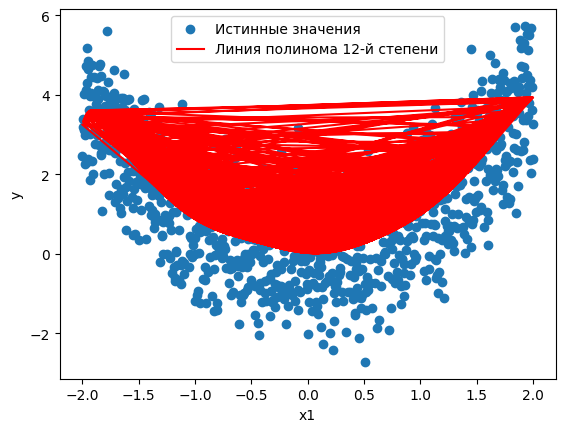

In [44]:
poly_features_12=PolynomialFeatures(degree=12)
x1_poly_12 = poly_features_12.fit_transform(x1.reshape(-1, 1))
model_poly_12 = LinearRegression()
model_poly_12.fit(x1_poly_12, y)
y_predict_poly_12 = model_poly_12.predict(x1_poly_12)

for  y_poly_12 in y_predict_poly_12:
    print(y_poly_12)

print('MAE 5:', metrics.mean_absolute_error(y, y_predict_poly_12))
print('R2 metric 5:', metrics.r2_score(y, y_predict_poly_12))  
plt.scatter(x1, y, label='Истинные значения')
plt.plot(x1, y_predict_poly_12, label='Линия полинома 12-й степени', color='red')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()  

Можно сделать вывод, что из нелинейного признака x1 удалось извлечь прогнозную силу через полиномиальные преобразования, причем оптимальная сложность модели находится вокруг 2-й степени.

**Вывод:** Проведенный анализ полиномиальной регрессии показал ее эффективность для моделирования нелинейных зависимостей в данных. Модель полиномиальной регрессии второй степени, построенная на признаке x1, продемонстрировала значительное улучшение качества предсказаний по сравнению с простой линейной регрессией - коэффициент детерминации R² вырос с практически нулевого значения до 0.54.

Исследование моделей с различными степенями полинома (2, 6 и 12) выявило важность выбора оптимальной сложности модели. 

### 3. Решение задачи регрессии различными методами

Был загружен набор данных salary.csv.
Описание столбцов

age — возраст сотрудника в годах.

income — годовой доход до текущей работы.

experience — количество полных лет профессионального опыта.

score_test — результат прохождения профессионального теста

hours_worked — среднее количество рабочих часов в неделю.

distance_to_work — расстояние от дома до места работы.

savings — сумма сбережений на банковском счёте.

debt — общий объём текущих долгов (по кредитам, картам и другим
обязательствам, в долларах).

education — уровень образования: «High School» (школа), «Bachelor»
(бакалавр), «Master» (магистр) или «PhD» (доктор наук).

city — город проживания: Нью-Йорк, Лос-Анджелес, Чикаго, Хьюстон или
Финикс.

job_type — сфера профессиональной деятельности: IT, финансы,
здравоохранение, образование или ритейл.

marital_status — семейное положение: «Single» (холост/незамужем), «Married»
(в браке) или «Divorced» (в разводе).

car — наличие автомобиля: «Yes» (есть) или «No» (нет).

remote_work — работает ли сотрудник удалённо: «Yes» или «No».

salary — : годовая зарплата

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('salary.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1500 non-null   int64  
 1   income            1500 non-null   float64
 2   experience        1500 non-null   int64  
 3   score_test        1500 non-null   float64
 4   hours_worked      1500 non-null   int64  
 5   distance_to_work  1500 non-null   float64
 6   savings           1500 non-null   float64
 7   debt              1500 non-null   float64
 8   education         1500 non-null   object 
 9   city              1500 non-null   object 
 10  job_type          1500 non-null   object 
 11  marital_status    1500 non-null   object 
 12  car               1500 non-null   object 
 13  remote_work       1500 non-null   object 
 14  salary            1500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 175.9+ KB


Для предсказания выбрана переменная salary, в контексте данных она является интересующей. Для salary построена гистограмма.

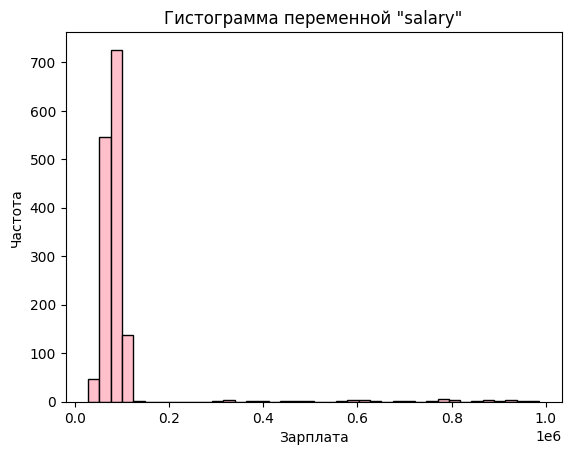

In [21]:
plt.hist(df['salary'], bins=40, color='pink', edgecolor='black')
plt.title('Гистограмма переменной "salary"')
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.show()

На гистограмме распределения salary наблюдается сильная правосторонняя асимметрия. Основная масса данных сосредоточена в левой части графика, что указывает на то, что большинство сотрудников имеют относительно невысокие зарплаты. При этом распределение имеет длинный правый хвост - это означает, что существует небольшое количество сотрудников с исключительно высокими зарплатами, которые значительно превышают средние значения.

Рассмотрим график boxplot по столбцу salary

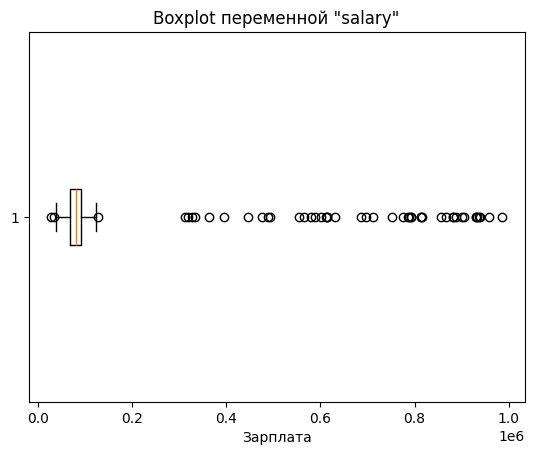

In [22]:
plt.boxplot(df['salary'], vert=False)
plt.title('Boxplot переменной "salary"')
plt.xlabel('Зарплата')
plt.show()

На boxplot переменной "salary" явно видны многочисленные выбросы в области высоких значений. Основная часть данных сосредоточена в узком диапазоне низких зарплат, в то время как выбросы простираются далеко вправо до значений около 1 миллиона.

Выполним обработку выбросов в переменной salary с помощью метода IQR. Сделаем расчет квартилей: Q1 (25-й перцентиль) и Q3 (75-й перцентиль). Вычисление IQR: разница между Q3 и Q1. Определим границы и проведем фильтрацию данных: удалим строки с зарплатами за пределами границ.

In [23]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_c = df[(df['salary'] >= lower_bound) & (df['salary'] <= upper_bound)]

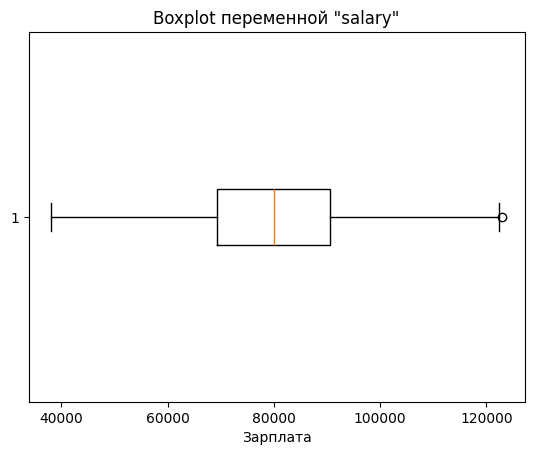

In [24]:
plt.boxplot(df_c['salary'], vert=False)
plt.title('Boxplot переменной "salary"')
plt.xlabel('Зарплата')
plt.show()

После обработки выбросов распределение зарплат стало значительно более сбалансированным. Диапазон зарплат теперь составляет от 40,000 до 120,000, что выглядит реалистично и соответствует типичным зарплатным данным. На boxplot медиана отображена красной линией.

Построена матрица диаграммы рассеяния с использованием pairplot для столбцов с возрастом, результатами теста и зарплатой. Для раскраски столбцов используется столбец с часами работы.

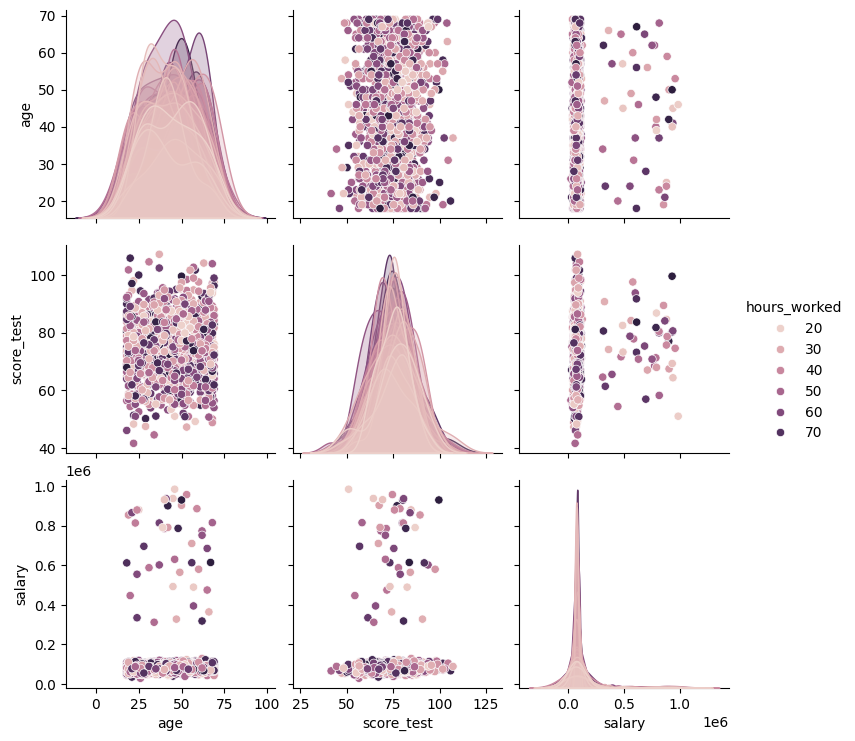

In [25]:
import seaborn as sns
sns.pairplot(df[['age','score_test', 'salary', 'hours_worked']], hue = 'hours_worked')

Данные демонстрируют взаимосвязи между профессиональными характеристиками сотрудников. Наиболее выражена зависимость между возрастом и зарплатой, что может отражать карьерный рост. Часы работы (hours_worked) выступают важным фактором, модифицирующим эти взаимосвязи.

Создается переменная со всеми числовыми столбцами, кроме столбца зарплатой. Затем создается объект StandartScaler, который обучается на числовых данных, и затем эти данные заменяются нормализованными значениями. Таким образом весь датафрейм будет содержать нормализованные числовые данные.

In [26]:
from sklearn.preprocessing import StandardScaler
numeric_columns = df_c.select_dtypes(include='number').drop(['salary'], axis=1).columns
numeric_data = df_c[numeric_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
df_c[numeric_columns] = scaled_data


C:\Users\polin\AppData\Local\Temp\ipykernel_21796\167509139.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c[numeric_columns] = scaled_data


Далее данные были разделены на обучающую и валидационную выборки. В данном случае в переменной X присваиваются значения, которые будут использоваться для обучения модели, присвоены все значения из всех числовых столбцов кроме salary. Y- переменная salary, которую надо предсказать. Train_test_split разделяет данные на обучающую (X_train, Y_train) и тестовую (X_test, Y_test) выборки. Test_size=0.25 означает, что 25% данных будут отложены для тестирования. Установка random_state на 0 гарантирует, что при каждом запуске кода будут выбраны одни и те же случайные данные для обучающей и тестовой выборки.

In [27]:
from sklearn.model_selection import train_test_split
X = df_c.select_dtypes(include='number').drop (['salary'], axis=1)
Y = df_c['salary']
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.25,
    random_state=0)

Создана и обучена на основе входных данных модель линейной регрессии.

In [28]:
from sklearn.linear_model import LinearRegression
model_3 = LinearRegression()
model_3.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Предсказаны значения и для оценки качества модели вычислены метрики.

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
import numpy as np
Y_predict = model_3.predict(X_test)

MSE6 = mean_squared_error(Y_test, Y_predict)
MAE6 = mean_absolute_error(Y_test, Y_predict)
RMSE6= np.sqrt(MSE)
R2_6 = r2_score(Y_test, Y_predict)

print("MSE:", MSE6)
print("MAE:", MAE6)
print("RMSE:", RMSE6)
print("R2:", R2_6)

MSE: 69554681.60013515
MAE: 6509.214214595931
RMSE: 1.6143906766055216
R2: 0.7031413595179865


Можно увидеть, что модель линейной регрессии показывает хорошее качество предсказаний, объясняя 70% дисперсии данных. Средняя ошибка прогноза составляет около 6500 единиц, что является приемлемым результатом для данной задачи.

Создан датафрейм с истинными и предсказанными значениями.

In [30]:
df_= pd.DataFrame({'Actual': Y_test, 'Predicted':Y_predict})
df_

,Actual,Predicted
1417,38091.827270,59302.494399
502,92747.084451,93198.923631
1334,80481.558048,79461.320568
281,86092.141598,91731.089481
289,75819.406791,76205.510077
...,...,...
995,101436.866344,108928.281947
766,84790.366895,81273.338630
1445,53067.988146,59580.544751
200,81842.326574,92043.711546


На основе датафрейма с фактическими и предсказанными значениями видно, что модель в целом хорошо предсказывает зарплаты, однако присутствуют заметные расхождения по отдельным наблюдениям. В некоторых случаях предсказания достаточно близки к фактическим значениям (например, 75819 против 76205), в других же есть существенные отклонения (38091 против 59302). 

Создан и выведен датафрейм с признаками и их коэффициентами.

In [31]:
a = model_3.coef_
b = model_3.intercept_
coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient_a': a, 'Coefficient_b': b})

print(coeff_df)

            Feature  Coefficient_a  Coefficient_b
0               age     534.698266   80110.020119
1            income    7240.279657   80110.020119
2        experience   10358.538224   80110.020119
3        score_test    1249.679360   80110.020119
4      hours_worked     293.410250   80110.020119
5  distance_to_work     -75.780385   80110.020119
6           savings     130.274794   80110.020119
7              debt    -375.096228   80110.020119


Наибольшее положительное влияние на зарплату оказывает опыт работы (experience) с коэффициентом 10358, что означает существенное увеличение зарплаты с ростом стажа. Доход (income) также сильно влияет на зарплату с коэффициентом 7240. Возраст (age) имеет умеренное положительное влияние (534), как и результаты тестирования (1249) и количество рабочих часов (293). Из отрицательных факторов выделяется долг (debt) с коэффициентом -375, что свидетельствует о обратной зависимости между задолженностью и уровнем зарплаты. Расстояние до работы также слабо отрицательно влияет на зарплату.


Для визуализации создан график с истинными и предсказанными значениями.

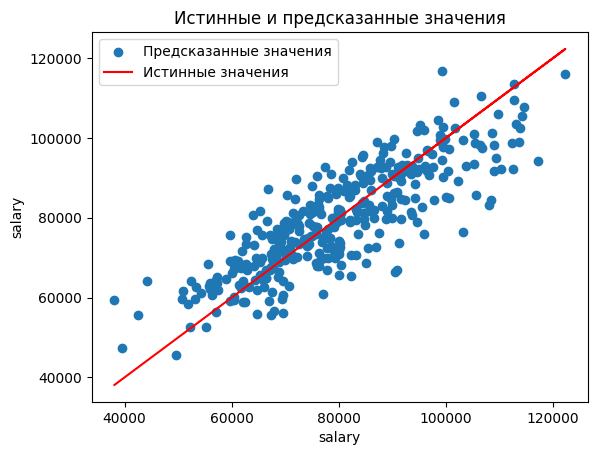

In [32]:
plt.scatter(Y_test, Y_predict, label='Предсказанные значения')
plt.plot(Y_test, Y_test, color='red', label='Истинные значения')
plt.title("Истинные и предсказанные значения")
plt.xlabel("salary")
plt.ylabel("salary")
plt.legend()
plt.show()

На графике видно, что предсказанные значения в целом следуют за истинными значениями, образуя диагональную направленность. Однако наблюдается значительный разброс точек вокруг красной линии идеальных предсказаний, особенно в области высоких значений зарплат. Общая тенденция предсказаний соответствует реальным данным, но присутствует систематическая ошибка, проявляющаяся в виде рассеяния точек. Это характерно для линейной регрессии и свидетельствует о том, что модель улавливает общую зависимость, но не все особенности данных.

Метод k-ближайших соседей предсказывает значение для нового наблюдения,на основе значений его ближайших соседей. Для реализации регрессии методом k-ближайших соседей, создана и обучена модель k-ближайших соседей, посчитаны метрики, реализован график.

MSE: 102530876.28437646
MAE: 8074.761379579826
RMSE: 10125.753121836246
R2: 0.5623993117215222


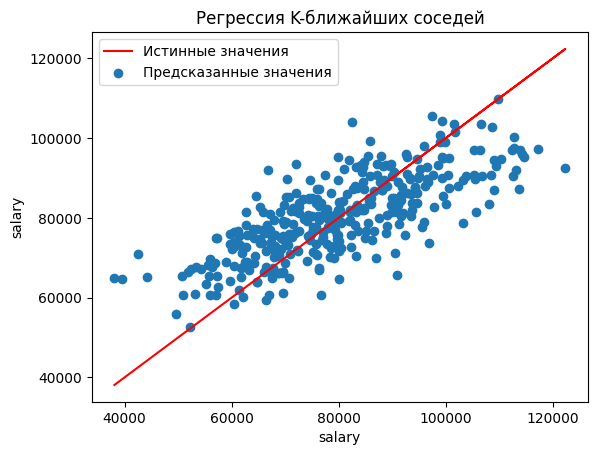

In [50]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, Y_train)

Y1_prediction =knn_model.predict(X_test)

MSE = mean_squared_error(Y_test, Y1_prediction )
MAE = mean_absolute_error(Y_test, Y1_prediction)
RMSE= np.sqrt(MSE)
R2 = r2_score(Y_test, Y1_prediction)

print("MSE:", MSE)
print("MAE:", MAE)
print("RMSE:", RMSE)
print("R2:", R2)


plt.plot(Y_test, Y_test,color='red', label="Истинные значения")
plt.scatter(Y_test, Y1_prediction, label="Предсказанные значения")
plt.xlabel("salary")
plt.ylabel("salary")
plt.title("Регрессия K-ближайших соседей")
plt.legend()
plt.show()

На основе результатов регрессии методом k-ближайших соседей можно сделать выводы: 
Метод  показал более низкое качество предсказаний по сравнению с линейной регрессией. Коэффициент детерминации R² составил 0.56, что означает, что модель объясняет только 56% дисперсии данных против 70% у линейной регрессии. Средняя абсолютная ошибка возросла до 8074 единиц, а среднеквадратичная ошибка значительно увеличилась.
На графике видно, что предсказания KNN имеют больший разброс вокруг линии идеальных предсказаний, особенно в области высоких значений зарплат. Точки расположены менее структурировано, чем в случае линейной регрессии, что свидетельствует о меньшей точности модели.


Модель дерева решений представляет собой структуру, где каждый узел представляет собой "вопрос" о некотором признаке данных, а каждая ветвь - ответ на этот вопрос. Цель состоит в том, чтобы последовательно разделять данные на наиболее однородные подгруппы (листья) по признакам, чтобы в конечном итоге получить точные прогнозы.Создана и обучена модель дерева решений. Вычислены метрики, построен график отображения регрессии. Max_depth используется для указания максимальной глубины дерева.

MSE: 127904475.35320158
MAE: 9007.186348694378
RMSE: 11309.486078208929
R2: 0.4541050610625922


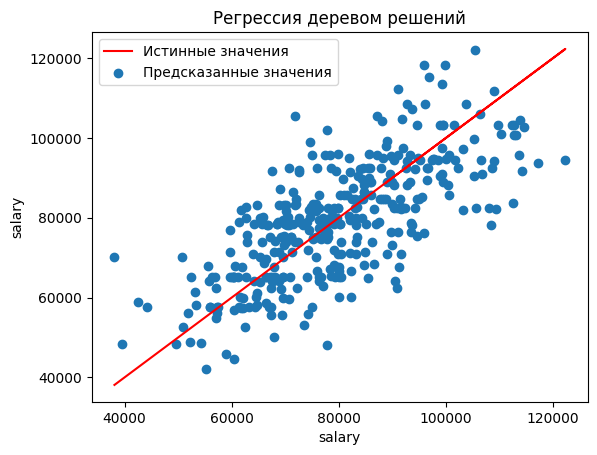

In [52]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=10)
tree_model.fit(X_train, Y_train)

Y2_prediction= tree_model.predict(X_test)

MSE = mean_squared_error(Y_test, Y2_prediction )
MAE = mean_absolute_error(Y_test, Y2_prediction)
RMSE= np.sqrt(MSE)
R2 = r2_score(Y_test, Y2_prediction)

print("MSE:", MSE)
print("MAE:", MAE)
print("RMSE:", RMSE)
print("R2:", R2)

plt.plot(Y_test, Y_test,color='red', label="Истинные значения")
plt.scatter(Y_test, Y2_prediction, label="Предсказанные значения")
plt.xlabel("salary")
plt.ylabel("salary")
plt.title("Регрессия деревом решений")
plt.legend()
plt.show()

Метод дерева решений показал наихудшие результаты среди всех. Коэффициент детерминации R² составил всего 0.45, что означает, что модель объясняет менее половины дисперсии данных. Средняя абсолютная ошибка выросла до 9007 единиц, а среднеквадратичная ошибка достигла наибольшего значения среди всех методов. На графике наблюдается значительный разброс предсказаний, особенно заметный в области средних и высоких значений зарплат.

Чтобы подвести итоги, все графики моделей показаны на одном.

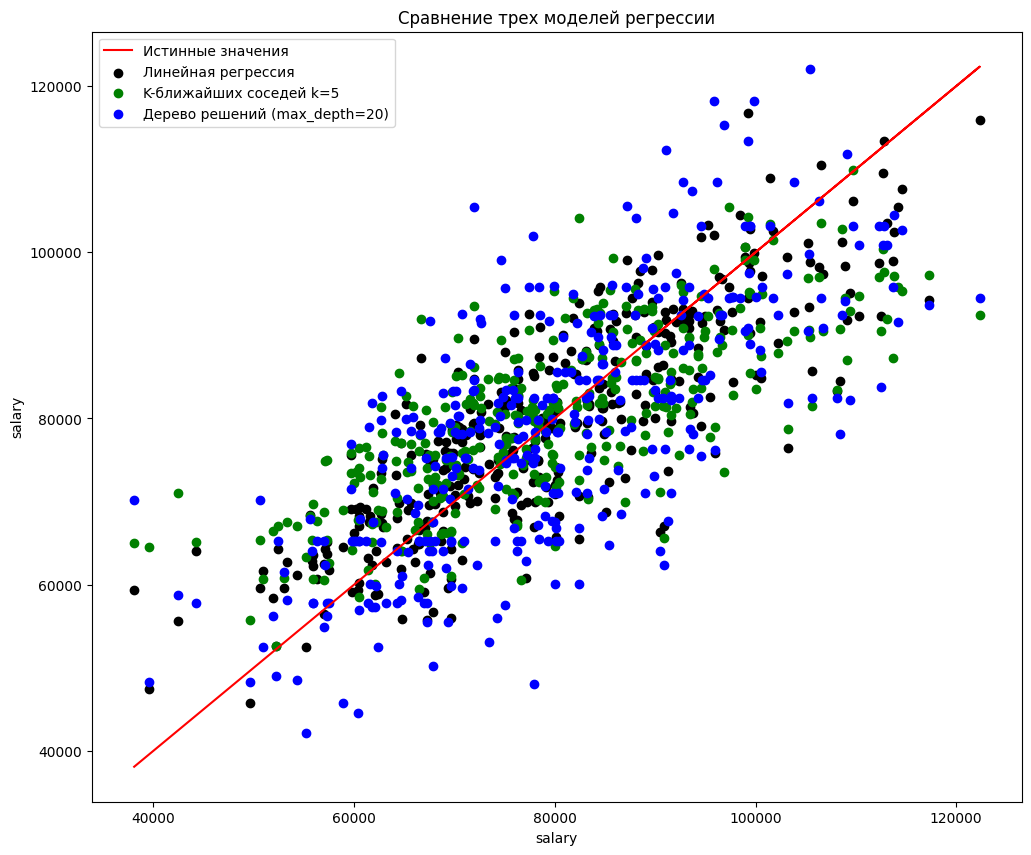

In [54]:
plt.figure(figsize=(12, 10))
plt.plot(Y_test, Y_test,color='red', label="Истинные значения")

plt.scatter(Y_test,Y_predict, color='black', label="Линейная регрессия")
plt.scatter(Y_test, Y1_prediction, color='green', label="K-ближайших соседей k=5")
plt.scatter(Y_test, Y2_prediction, color='blue', label="Дерево решений (max_depth=20)")

plt.title("Сравнение трех моделей регрессии")
plt.xlabel("salary")
plt.ylabel("salary")
plt.legend()
plt.show()

На основе сравнения трех моделей регрессии можно сделать окончательный вывод:

Линейная регрессия демонстрирует наилучшие результаты - предсказания наиболее сконцентрированы вокруг линии идеальных предсказаний и имеют наименьший разброс. Это подтверждается метриками качества (R² = 0.70).

Метод k-ближайших соседей показывает средние результаты с бóльшим разбросом предсказаний, особенно в области высоких значений зарплат.

Дерево решений оказалось наименее эффективным методом с наибольшим разбросом и систематическими ошибками предсказания.

Для прогнозирования зарплат в данных условиях лучщн использовать линейную регрессию, как метод.

### Вывод

В ходе выполнения лабораторной работы обучена модель простой линейной регрессии и множественной линейной регрессии с двумя предикторами. Реализована и обучена модель полиномиальной регрессии, которая показала, чем больше степень полинома для модели, тем больше предсеказанные значения похожи на истинные.

Из датафрейма выбрана целевая переменная salary, которая предсказывалась на основе имеющихся характеристик сотрудников.Было произведено обучение модели k-ближайших соседей, дерева решений, и простой линейной регрессии на одних данных. Самой подходящей для предсказания цена на рассматриваемых данных оказалась модель линейной регрессии. Для оценки качества предсказания для всех моделей вычислены метрики, и построены графики для визуализации регрессии.